In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
heart_data['sex'][heart_data['sex'] == 0] ='female'
heart_data['sex'][heart_data['sex'] == 1] ='male'

heart_data['cp'][heart_data['cp'] == 0] = 'typical angina'
heart_data['cp'][heart_data['cp'] == 1] = 'atypical angina'
heart_data['cp'][heart_data['cp'] == 2] = 'non-anginal'
heart_data['cp'][heart_data['cp'] == 3] = 'asymptotic'

heart_data['fbs'][heart_data['fbs'] == 0] = 'lower than 120ml/mg'
heart_data['fbs'][heart_data['fbs'] == 1] = 'upper than 120ml/mg'

heart_data['exang'][heart_data['exang'] == 0] = 'no'
heart_data['exang'][heart_data['exang'] == 1] = 'yes'

heart_data['slope'][heart_data['slope'] == 1] = 'upsloping'
heart_data['slope'][heart_data['slope'] == 2] = 'flat'
heart_data['slope'][heart_data['slope'] == 3] = 'downsloping'

heart_data['thal'][heart_data['thal'] == 1] = 'normal'
heart_data['thal'][heart_data['thal'] == 2] = 'fixed defect'
heart_data['thal'][heart_data['thal'] == 3] = 'reversable defect '

C:\Users\user\AppData\Local\Temp\ipykernel_5568\2726682182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['sex'][heart_data['sex'] == 0] ='female'
C:\Users\user\AppData\Local\Temp\ipykernel_5568\2726682182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['cp'][heart_data['cp'] == 0] = 'typical angina'
C:\Users\user\AppData\Local\Temp\ipykernel_5568\2726682182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [47]:
heart_data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg       int64
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [48]:
ObjToCat = ['sex','cp','fbs','exang','slope','thal']

for i in ObjToCat:
    heart_data[i]=heart_data[i].astype('category')

In [49]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   category
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   category
 6   restecg   1025 non-null   int64   
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   category
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   category
 11  ca        1025 non-null   int64   
 12  thal      1025 non-null   category
 13  target    1025 non-null   int64   
dtypes: category(6), float64(1), int64(7)
memory usage: 71.1 KB


In [50]:
#Creating Dummy

heart_data = pd.get_dummies(heart_data,drop_first=True)
heart_data.head()

,age,trestbps,chol,restecg,thalach,oldpeak,ca,target,sex_male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_upper than 120ml/mg,exang_yes,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,52,125,212,1,168,1.0,2,0,1,0,0,1,0,0,1,0,0,0,1
1,53,140,203,0,155,3.1,0,0,1,0,0,1,1,1,0,0,0,0,1
2,70,145,174,1,125,2.6,0,0,1,0,0,1,0,1,0,0,0,0,1
3,61,148,203,1,161,0.0,1,0,1,0,0,1,0,0,1,0,0,0,1
4,62,138,294,1,106,1.9,3,0,0,0,0,1,1,0,0,1,1,0,0


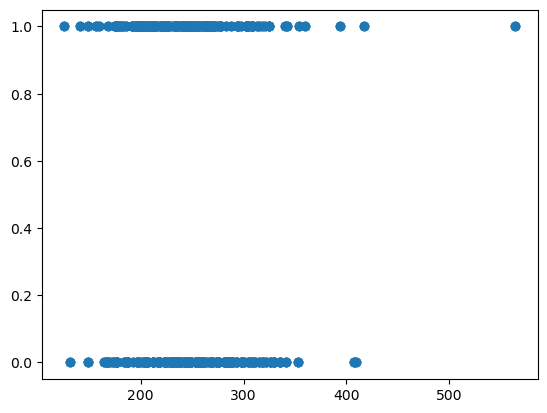

In [51]:
x=heart_data['chol']
y=heart_data['target']
plt.scatter(x,y)
plt.show()

In [52]:
X=heart_data.drop('target',axis=1)
Y=heart_data['target']

In [53]:
X.head()

,age,trestbps,chol,restecg,thalach,oldpeak,ca,sex_male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_upper than 120ml/mg,exang_yes,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,52,125,212,1,168,1.0,2,1,0,0,1,0,0,1,0,0,0,1
1,53,140,203,0,155,3.1,0,1,0,0,1,1,1,0,0,0,0,1
2,70,145,174,1,125,2.6,0,1,0,0,1,0,1,0,0,0,0,1
3,61,148,203,1,161,0.0,1,1,0,0,1,0,0,1,0,0,0,1
4,62,138,294,1,106,1.9,3,0,0,0,1,1,0,0,1,1,0,0


In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
model=DecisionTreeClassifier()

In [55]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [57]:
model.score(X_test,Y_test)*100

98.53658536585365

In [58]:
y_predicted = model.predict(X_test)

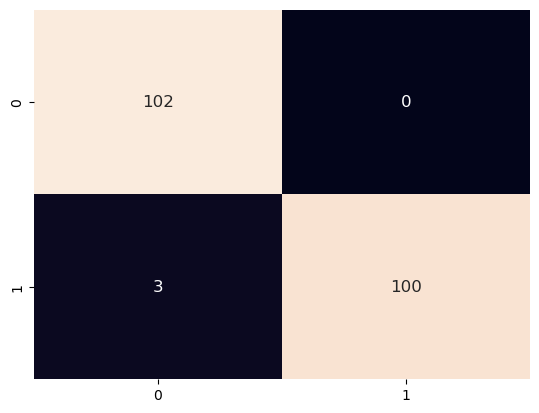

In [59]:
#Checking Confusion Table

cm=confusion_matrix(Y_test,y_predicted)
sns.heatmap(cm,annot=True,fmt='d',cbar=False,annot_kws={'size':12})
plt.show()

In [60]:
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

